In [1]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_conjunto = pd.read_csv("../../files/df_conjunto.csv", index_col=0)

In [3]:
df_conjunto.head()

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,1,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,2,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,3,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,4,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2018,10,6,2,8,3352,335.0,465,38


In [4]:
df_conjunto.isna().sum()

loyalty_number                 0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
salary                         0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
cancellation_year              0
cancellation_month             0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

In [5]:
df_conjunto.dtypes

loyalty_number                   int64
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
cancellation_year                int64
cancellation_month               int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
dtype: object

**Fase 2: Visualización**

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [6]:
vuelos_mes = df_conjunto.groupby(['year', 'month'])['flights_booked'].sum().reset_index()


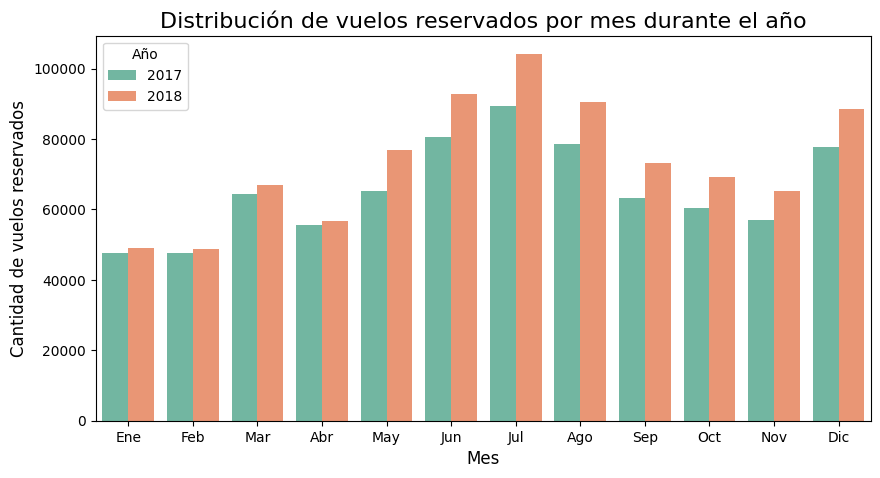

In [7]:
plt.figure(figsize=(10, 5))  # Tamaño de la figura (ajustable)
sns.barplot(data=vuelos_mes, x='month', y='flights_booked', hue='year', palette= "Set2") #Usamos el hue para diferenciar los años
# Personalización del gráfico
plt.title('Distribución de vuelos reservados por mes durante el año', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de vuelos reservados', fontsize=12)
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año', loc='upper left');

El gráfico nos permite ver la subida en los meses de verano, con los mayores valores en el mes de julio y una subida puntual el mes de diciembre. También podemos observar que los mayores valores son en el año 2018.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

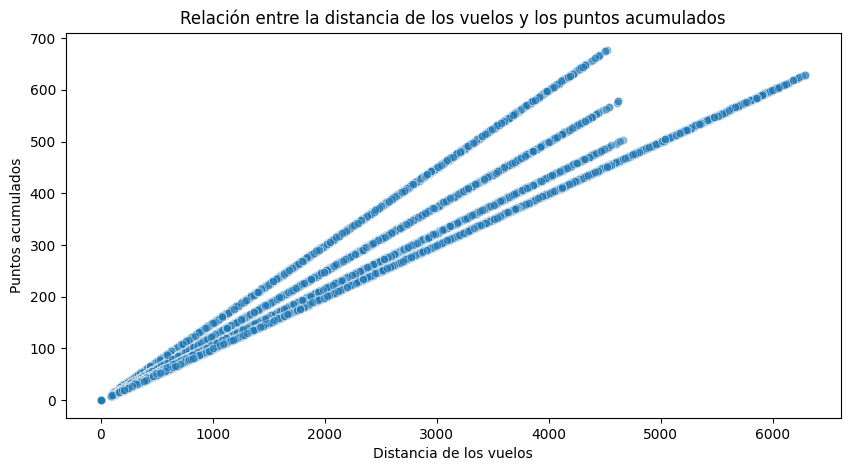

In [8]:
# Vamos a utilizar un scatterplot para identificar la relación entre dos variables

plt.figure(figsize=(10, 5))
# Creamos el scatterplot
sns.scatterplot(x="distance", y="points_accumulated", data=df_conjunto, alpha=0.5)
# Añadimos el título y las etiquetas de los ejes
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados');


Se puede observar que hay una correlación entre las dos variables, ya que a más distancia, más puntos se acumulan.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

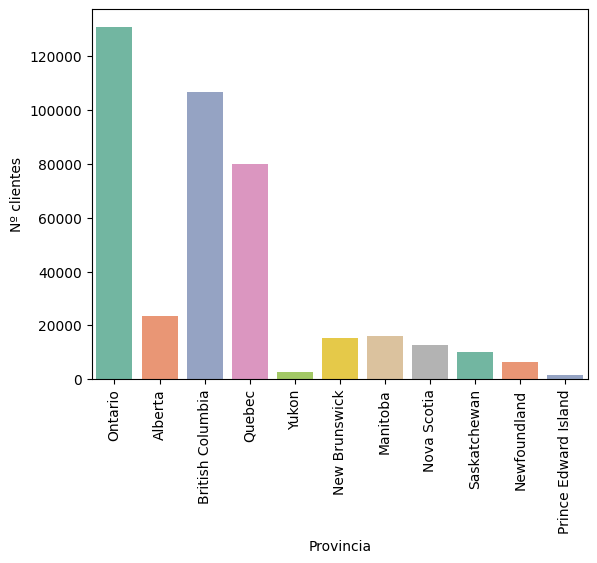

In [9]:
sns.countplot(x = "province", 
              data = df_conjunto,
              palette = "Set2")

# Giro las etiquetas del eje x para que no se superpongan:
plt.xticks(rotation = 90)

# Título de los ejes:
plt.xlabel("Provincia")
plt.ylabel("Nº clientes");

La mayoría de clientes son de Ontario y donde menos clientes hay es en Prince Edward Island.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

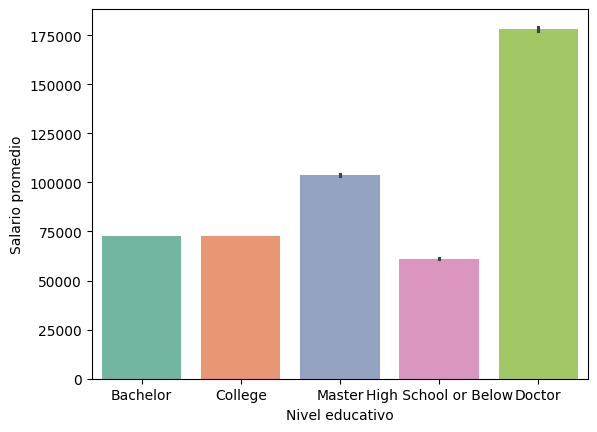

In [10]:
sns.barplot(x = "education", 
            y = "salary", 
            data = df_conjunto,
            palette = "Set2")

plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio");

Se puede observar en la gráfica, el mayor salario es en la categoría "Doctor" y el menor salario en "High School".

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [11]:
df_conjunto.groupby("loyalty_card")["loyalty_number"].count().reset_index()


,loyalty_card,loyalty_number
0,Aurora,83832
1,Nova,137568
2,Star,184224


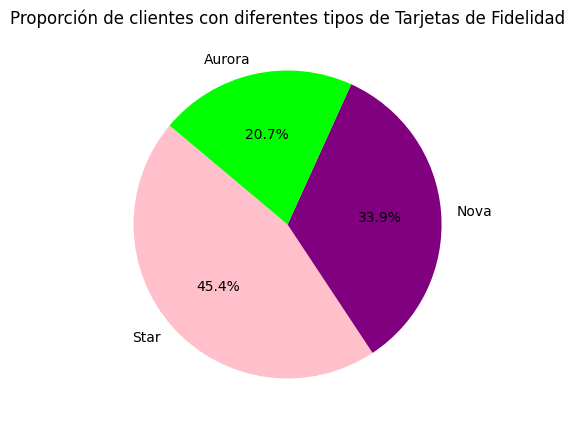

In [14]:
# Contamos el número de clientes para cada tipo de tarjeta de fidelidad
loyalty_card_counts = df_conjunto['loyalty_card'].value_counts()
# Configuración del tamaño de la figura
plt.figure(figsize=(5, 5))
# Creamos el gráfico pieplot
plt.pie(loyalty_card_counts, labels=loyalty_card_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FFC0CB', '#800080', '#00FF00'])
# Añadir un título
plt.title('Proporción de clientes con diferentes tipos de Tarjetas de Fidelidad')
# Mostrar el gráfico
plt.show()

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

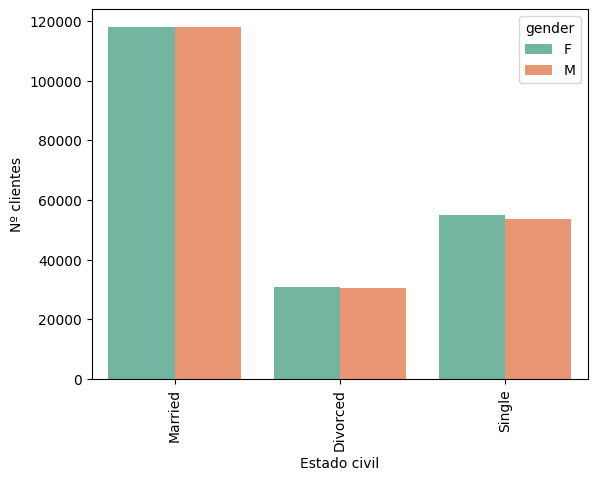

In [16]:
sns.countplot(x = "marital_status", 
              data = df_conjunto, 
              palette = "Set2", 
              hue = "gender")

# Giro las etiquetas:
plt.xticks(rotation = 90)

# Título ejes:
plt.xlabel("Estado civil")
plt.ylabel("Nº clientes");

La mayoría de clientes están casados.